In [99]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [100]:

from keras import regularizers

In [101]:
import os

In [102]:
A= os.listdir('/content/AudioDataset/PersonA/')

In [103]:
B= os.listdir('/content/AudioDataset/PersonB/')

In [104]:
type(A)

list

In [105]:

print(A[3])

STE-106_person A.wav


In [106]:
data, sampling_rate = librosa.load('/content/AudioDataset/PersonA/STE-055_person A.wav')

Populating the interactive namespace from numpy and matplotlib


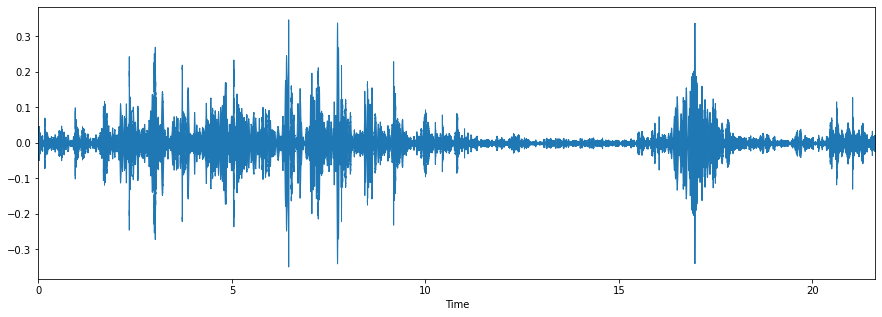

In [107]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [108]:
from glob import glob
#directories of normal audios
perA = "/content/AudioDataset/PersonA/"
perAaudio = glob(perA + "*.wav")

In [109]:
perAaudio

['/content/AudioDataset/PersonA/STE-104_person A.wav',
 '/content/AudioDataset/PersonA/STE-108_person A.wav',
 '/content/AudioDataset/PersonA/STE-106_person A.wav',
 '/content/AudioDataset/PersonA/STE-109_person A.wav',
 '/content/AudioDataset/PersonA/STE-113_person A.wav',
 '/content/AudioDataset/PersonA/STE-066_person A.wav',
 '/content/AudioDataset/PersonA/STE-107_person A.wav',
 '/content/AudioDataset/PersonA/STE-112_person A.wav',
 '/content/AudioDataset/PersonA/STE-058_person A.wav',
 '/content/AudioDataset/PersonA/STE-111_person A.wav',
 '/content/AudioDataset/PersonA/STE-110_person A.wav',
 '/content/AudioDataset/PersonA/STE-055_person A.wav',
 '/content/AudioDataset/PersonA/STE-056_person A.wav',
 '/content/AudioDataset/PersonA/STE-065_person A.wav',
 '/content/AudioDataset/PersonA/STE-054_person A.wav',
 '/content/AudioDataset/PersonA/STE-067_person A.wav',
 '/content/AudioDataset/PersonA/STE-064_person A.wav',
 '/content/AudioDataset/PersonA/STE-102_person A.wav',
 '/content

In [110]:
A_audios_feat = []
for file in perAaudio:
   y , sr = librosa.load(file,sr=None)
   feature_vector = get_feature_vector(y, sr)
   A_audios_feat.append(feature_vector) 

In [111]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [112]:
import csv
norm_output = "A.csv"
header =[
 "chroma_stft",
 "spectral_centroid",
 "spectral_bandwidth",
 "spectral_rolloff",
 "rms",
 "zero_crossing_rate"
]
with open(norm_output,"+w") as f:
 csv_writer = csv.writer(f, delimiter = ",")
 csv_writer.writerow(header)
 csv_writer.writerows(A_audios_feat)

In [113]:
df=pd.read_csv("A.csv")

In [121]:
df.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Type
0,0.806894,2653.491201,4519.506308,6430.496979,0.037307,0.011277,PersonA
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046,PersonA
2,0.807777,2279.054666,4207.761124,5325.456687,0.055860,0.008845,PersonA
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492,PersonA
4,0.806906,2261.926962,4170.530987,5245.849872,0.061568,0.009112,PersonA


In [115]:
typeof=[]
for item in A:
  typeof.append("PersonA")

In [117]:
df["Type"]=pd.DataFrame(typeof)

In [122]:
from glob import glob
#directories of normal audios
perB = "/content/AudioDataset/PersonB/"
perBaudio = glob(perA + "*.wav")

In [123]:
B_audios_feat = []
for file in perBaudio:
   y , sr = librosa.load(file,sr=None)
   feature_vector = get_feature_vector(y, sr)
   B_audios_feat.append(feature_vector) 

In [124]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [125]:
import csv
norm_output = "B.csv"
header =[
 "chroma_stft",
 "spectral_centroid",
 "spectral_bandwidth",
 "spectral_rolloff",
 "rms",
 "zero_crossing_rate"
]
with open(norm_output,"+w") as f:
 csv_writer = csv.writer(f, delimiter = ",")
 csv_writer.writerow(header)
 csv_writer.writerows(B_audios_feat)

In [126]:
df1=pd.read_csv("B.csv")

In [127]:
df1.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate
0,0.806894,2653.491201,4519.506308,6430.496979,0.037307,0.011277
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046
2,0.807777,2279.054666,4207.761124,5325.456687,0.055860,0.008845
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492
4,0.806906,2261.926962,4170.530987,5245.849872,0.061568,0.009112


In [128]:
typeof1=[]
for item in B:
  typeof1.append("PersonB")

In [129]:
df1["Type"]=pd.DataFrame(typeof1)

In [130]:
df1.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Type
0,0.806894,2653.491201,4519.506308,6430.496979,0.037307,0.011277,PersonB
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046,PersonB
2,0.807777,2279.054666,4207.761124,5325.456687,0.055860,0.008845,PersonB
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492,PersonB
4,0.806906,2261.926962,4170.530987,5245.849872,0.061568,0.009112,PersonB


In [133]:
data=pd.concat([df,df1])

In [134]:
data

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Type
0,0.806894,2653.491201,4519.506308,6430.496979,0.037307,0.011277,PersonA
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046,PersonA
2,0.807777,2279.054666,4207.761124,5325.456687,0.055860,0.008845,PersonA
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492,PersonA
4,0.806906,2261.926962,4170.530987,5245.849872,0.061568,0.009112,PersonA
5,0.787384,2096.002371,4021.929768,4688.796396,0.066521,0.009028,PersonA
6,0.797656,2301.171384,4175.916201,5401.917042,0.065398,0.009160,PersonA
7,0.806577,2457.657425,4408.653888,5906.218090,0.045823,0.008478,PersonA
8,0.760122,2110.905221,4051.562048,4647.303025,0.053849,0.008583,PersonA
9,0.803475,2238.287072,4186.886376,5311.523438,0.064283,0.007693,PersonA


In [135]:
from sklearn.utils import shuffle
data = shuffle(data)
data[:10]

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Type
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492,PersonA
14,0.781312,2305.849025,4084.854711,5286.933909,0.069697,0.012330,PersonA
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046,PersonB
21,0.788839,2885.987777,4514.588549,7048.895168,0.049177,0.017076,PersonA
20,0.791232,2460.599396,4335.807316,5745.892943,0.037336,0.010879,PersonA
21,0.788839,2885.987777,4514.588549,7048.895168,0.049177,0.017076,PersonB
13,0.788193,2151.973494,3931.773666,4772.865645,0.088414,0.010817,PersonA
22,0.804308,2462.872849,4350.254254,5942.451205,0.046022,0.010317,PersonA
3,0.804131,2405.564870,4340.162783,5757.031146,0.050864,0.009492,PersonB
1,0.800771,2493.904772,4432.927601,6044.037567,0.043360,0.010046,PersonA


In [136]:
data.isnull().sum()

chroma_stft           0
spectral_centroid     0
spectral_bandwidth    0
spectral_rolloff      0
rms                   0
zero_crossing_rate    0
Type                  0
dtype: int64

In [ ]:
data.info()